# Divide a normed sample set into Clusters

Now, we apply the algorithm to the whole sample where $g_{BB}$, $g_{CC}$, $g_{AB}$, $g_{AC}$, $g_{BC}$ can be varied. Based on the previous analyis we focus on K-Means as this seems to be more promising.

Aim will be to reproduce the previous findings from *find_clusters_red_sample_v3_gAB_gAC_gBC.ipynb* and to explore the impact of $g_{BB}$ and $g_{CC}$.

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

import helper_fcts


In [2]:
df_pca = pd.read_pickle('df_main_normed_std_pca_50.p')
features = df_pca.iloc[:, 6:]

df_pca.loc[:, 'gAB * gAC'] = df_pca.loc[:, 'gAB'] * df_pca.loc[:, 'gAC']


## 1. Determine reasonable cluster number

Here we try to reproduce the findings made in *find_clusters_red_sample_v3_gAB_gAC_gBC.ipynb*.

In [3]:
wcss = []
for number_of_clusters in range(1, 10):
    model = KMeans(
        n_clusters=number_of_clusters,
        random_state=0
    )
    model.fit(features)
    wcss.append(model.score(features))

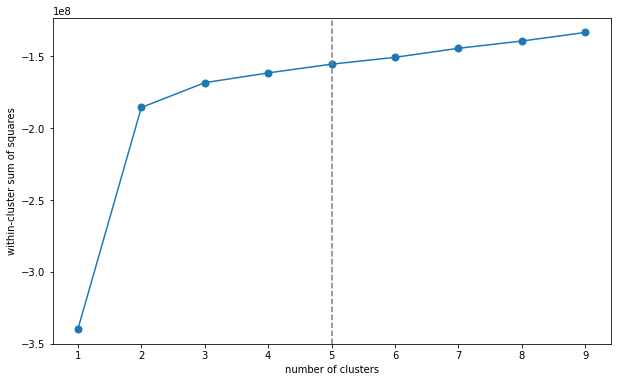

In [4]:
fig, ax = plt.subplots(figsize=[10, 6])

ax.plot(range(1, 10), wcss, marker='o', markersize=7)

ax.set_xlabel('number of clusters')
ax.set_ylabel('within-cluster sum of squares')
ax.axvline(5, color='gray', ls='--');

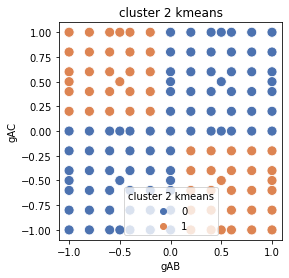

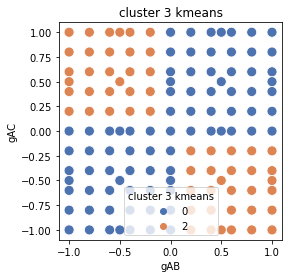

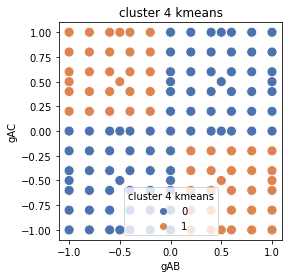

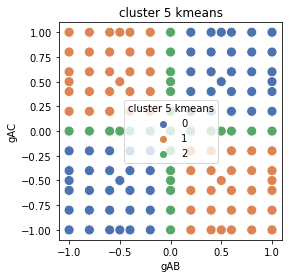

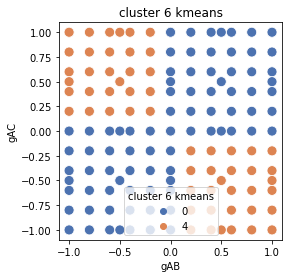

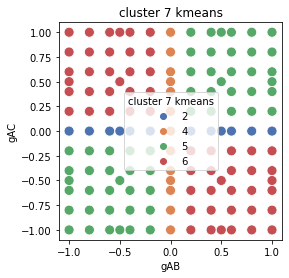

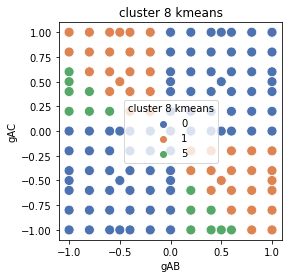

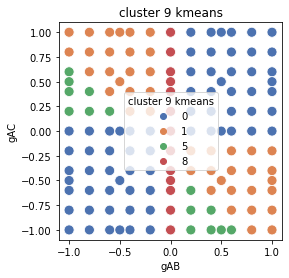

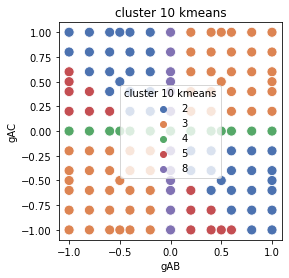

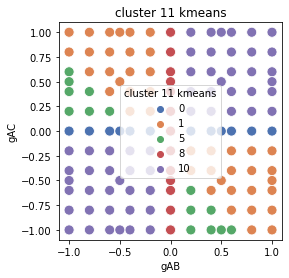

In [5]:
%matplotlib inline

mask_gBBgCCgBC_0 = (
    (df_pca.loc[:, 'gBB']==0) &
    (df_pca.loc[:, 'gCC']==0) &
    (df_pca.loc[:, 'gBC']==0)
)

for n_clusters in range(2, 12):

    model = KMeans(
        n_clusters=n_clusters,
        random_state=0
    )

    model.fit(features)

    df_pca.loc[:, f'cluster {n_clusters} kmeans'] = model.labels_
    
    fig, axes = plt.subplots(1, 1, figsize=(4, 4))

    sns.scatterplot(
        x='gAB',
        y='gAC',
        hue=f'cluster {n_clusters} kmeans',
        data=df_pca.loc[mask_gBBgCCgBC_0, :],
        palette='deep',
        alpha=1,
        ax=axes,
        s=100
    )
    axes.set_title(f'cluster {n_clusters} kmeans')
    
    
    
    plt.show()

**Sanity check I**: $g_{BB}=g_{CC}=g_{BC}=0$ and varying $g_{AB}$ and $g_{AC}$ expected correlation patterns where correctly classified when setting the **number of clusters to 5 and 7.**

<IPython.core.display.Javascript object>


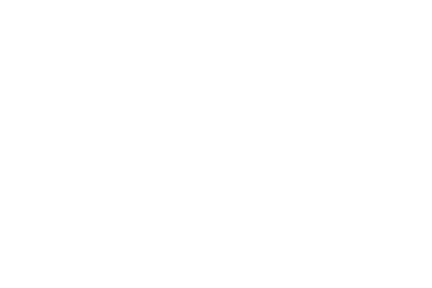

In [6]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Use scatter, coloring by 's', with a colormap

colors = ['tomato', 'cornflowerblue', 'orange', 'gold', 'forestgreen', 'lightgray', 'purple', 'lime']

n_cluster = 7

mask_gBBgCC_0 = (
    (df_pca.loc[:, 'gBB']==0) &
    (df_pca.loc[:, 'gCC']==0)
)

mask = mask_gBBgCC_0
# mask = df_red.loc[:, f'cluster {n_cluster} kmeans'] != -1
# mask = df_red.loc[:, f'cluster {n_cluster} kmeans'] == 0
# mask = df_red.loc[:, 'gBC'].abs() < 0.1

sc = ax.scatter(
    df_pca.loc[mask, 'gAB'],
    df_pca.loc[mask, 'gAC'],
    df_pca.loc[mask, 'gBC'],
    c=df_pca.loc[mask, f'cluster {n_cluster} kmeans'],
    cmap=ListedColormap(colors),
    s=50
)

# Add colorbar to show 's' scale
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('s (color scale)')

ax.set_xlabel('gAB')
ax.set_ylabel('gAC')
ax.set_zlabel('gBC')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)



plt.show()


**Sanity check II**: $g_{BB}=g_{CC}=0$ and varying $g_{AB}$ and $g_{AC}$ and $g_{BC}$ the correlation patterns from *find_clusters_red_sample_v3_gAB_gAC_gBC.ipynb* where adequately classified for **cluster numbers 5 and 7.**

## 2. Explore impact of $g_{BB}$ and $g_{CC}$

<IPython.core.display.Javascript object>


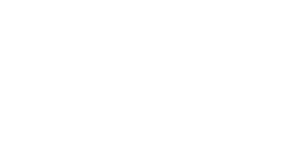

In [7]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Use scatter, coloring by 's', with a colormap

colors = ['tomato', 'cornflowerblue', 'orange', 'gold', 'forestgreen', 'lightgray', 'purple', 'lime']

n_cluster = 7

mask_gBBgCC_0 = (
    (df_pca.loc[:, 'gBB']==1) &
    (df_pca.loc[:, 'gCC']==1)
)

mask = mask_gBBgCC_0
# mask = df_red.loc[:, f'cluster {n_cluster} kmeans'] != -1
# mask = df_red.loc[:, f'cluster {n_cluster} kmeans'] == 0
# mask = df_red.loc[:, 'gBC'].abs() < 0.1

sc = ax.scatter(
    df_pca.loc[mask, 'gAB'],
    df_pca.loc[mask, 'gAC'],
    df_pca.loc[mask, 'gBC'],
    c=df_pca.loc[mask, f'cluster {n_cluster} kmeans'],
    cmap=ListedColormap(colors),
    s=50
)

# Add colorbar to show 's' scale
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('s (color scale)')

ax.set_xlabel('gAB')
ax.set_ylabel('gAC')
ax.set_zlabel('gBC')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)



plt.show()


In [8]:
%matplotlib inline

In [40]:
def cluster_IDs_parameter_line(df, n_cluster, gBB=None, gCC=None, gAB=None, gAC=None, gBC=None):
    """Return cluster indices for a one-dimensional cut throught the paramter space.
    
    If an interaction parameter is given it is fixed.
    
    Args:
        df (DataFrame): input DataFrame with parameter values and correlation data
        n_cluster (int): number of clusters considered
        gBB (float): interaction strength between B particles, default=None
        gCC (float): interaction strength between B particles, default=None
        gAB (float): interaction strength between A and B particles, default=None
        gAC (float): interaction strength between A and C particles, default=None
        gBC (float): interaction strength between B and C particles, default=None
        
    Returns:
        Sorted and masked DataFrame.
    """
       
    g_not_None = []
    mask = np.full(df.shape[0], True, dtype=bool)

    if gBB is None:
        g_not_None.append('gBB')
    else:
        mask &= df.loc[:, 'gBB'] == gBB
    
    if gCC is None:
        g_not_None.append('gCC')
    else:
        mask &= df.loc[:, 'gCC'] == gCC
        
    if gAB is None:
        g_not_None.append('gAB')
    else:
        mask &= df.loc[:, 'gAB'] == gAB

    if gAC is None:
        g_not_None.append('gAC')
    else:
        mask &= df.loc[:, 'gAC'] == gAC

    if gBC is None:
        g_not_None.append('gBC')
    else:
        mask &= df.loc[:, 'gBC'] == gBC

    # determine interaction name which is not None
    if len(g_not_None) == 1:
        g_name = g_not_None[0]
    else:
        raise NotImplementedError('Only one parameter should be not None')

    # sort according to gXY and remove duplicates
    df_masked = df.loc[mask, [g_name, 'path', f'cluster {n_cluster} kmeans']].sort_values(g_name)
    df_unique = df_masked.drop_duplicates(subset=g_name)
    
    return df_unique


df_cut = cluster_IDs_parameter_line(df=df_pca, n_cluster=7, gBB=1.0, gCC=1.0, gAB=1.0, gAC=1.0, gBC=None)

display(df_cut)

,gBC,path,cluster 7 kmeans
14629,-1.0,data/batch_011/run_01320,0
14630,-0.8,data/batch_011/run_01321,0
14631,-0.6,data/batch_011/run_01322,0
17762,-0.5,data/batch_016/run_00622,5
14632,-0.4,data/batch_011/run_01323,5
14633,-0.2,data/batch_011/run_01324,5
14634,0.0,data/batch_011/run_01325,5
14635,0.2,data/batch_011/run_01326,6
14636,0.4,data/batch_011/run_01327,1
17764,0.5,data/batch_016/run_00624,1


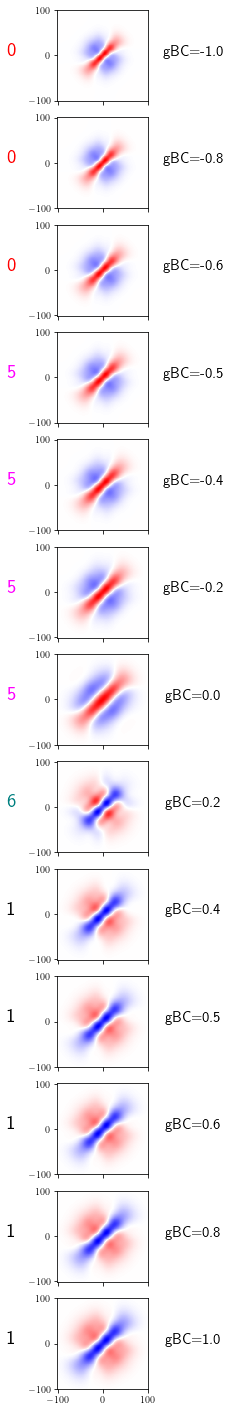

In [42]:
def corr_cplot_series(df):
    """Plot each correlation functions of a given DataFrame
    
    df columns should look like this:
    gXY, path, cluster_X_kmeans
    
    Args:
        df (DataFrame): Input DataFrame with paths to correlation npz-files.
    
    Returns:
        figure
    """

    length = df.shape[0]
    
    if length > 20:
        raise ValueError("Too many plots will be generated.")
    
    fig, axes = plt.subplots(length, 1, figsize=(5, 1.5*length), sharex=True, sharey=True, constrained_layout=True)
    plt.rc('text', usetex=True)
    
    colors = ['red', 'black', 'orange', 'green', 'blue', 'magenta', 'teal']
    
    x_grid = np.linspace(-100, 100, 200)
    x, y = np.meshgrid(x_grid, x_grid)
    
    for i, index in enumerate(df.index):

        corr_mat = np.load(df.loc[index, 'path'] + '/correlation_fct_BC.npz')['corrBC']
        
        axes[i].set_aspect(1)

        vlim = np.max(np.abs(corr_mat))
        im = axes[i].pcolormesh(x, y, corr_mat, shading='auto', cmap='bwr',
                           vmin=-vlim, vmax=vlim)

        divider = make_axes_locatable(axes[i])
        # cax = divider.append_axes("right", size="7%", pad=0.05)
        # fig.colorbar(im, cax=cax)
        
        cluster_id = df.iloc[i, 2]
        axes[i].annotate(
            f'{cluster_id}',
            xy=(-0.5, 0.5),
            xycoords='axes fraction',
            ha='center',
            fontsize=20,
            fontweight="bold",
            color=colors[cluster_id]
        )

        axes[i].annotate(
            f'{df.columns[0]}={df.iloc[i, 0]}',
            xy=(1.5, 0.5),
            xycoords='axes fraction',
            ha='center',
            fontsize=15,
            fontweight="bold",
        )

    plt.show()

corr_cplot_series(df_cut)